In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the file
df=pd.read_excel("datasets\\dataset_preprocessing.xlsx")
df1 = df.copy()
df1.head(2)

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.0,9,40000.0,Under_Graduate,0.0
1,HR,33.0,12,48000.0,Master,0.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         30 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [5]:
df1.describe()

,Age,Salary,Projects
count,30.000000,31.000000,27.000000
mean,37.333333,41983.870968,2.148148
std,18.690461,15998.168578,1.261980
min,0.000000,20000.000000,0.000000
25%,29.500000,35500.000000,1.000000
50%,34.500000,42000.000000,2.000000
75%,48.750000,45250.000000,3.000000
max,75.000000,90000.000000,5.000000


In [6]:
df1.describe(include="object")

,Dept,Experience,Education
count,31,29,31
unique,4,15,5
top,HR,12,Master
freq,13,6,12


In [8]:
# Finding the missing value
df1.isnull().sum()

Dept          2
Age           3
Experience    4
Salary        2
Education     2
Projects      6
dtype: int64

In [9]:
# percentage of missing value
df1.isnull().mean()*100

Dept           6.060606
Age            9.090909
Experience    12.121212
Salary         6.060606
Education      6.060606
Projects      18.181818
dtype: float64

#### How to handle missing values?

- If the column has more than 50% missing value. Drop the column because imputation approach will have a good amount of biasness. (Basically filling with fake values)
- If we have less no. of missiing value say 20%. we can apply imputation. (filling values)
- If we have some 2-3% missing value we can drop the missing value. -- row wise drop approach

In [12]:
df1["Age"]

0     32.0
1     33.0
2     35.0
3      NaN
4     34.0
5     33.0
6     56.0
7      NaN
8     31.0
9     45.0
10    50.0
11    75.0
12    29.0
13    32.0
14    38.0
15     0.0
16    42.0
17    50.0
18    38.0
19     0.0
20    52.0
21    27.0
22    42.0
23     0.0
24    51.0
25    28.0
26    29.0
27    42.0
28    70.0
29    32.0
30    19.0
31    75.0
32     NaN
Name: Age, dtype: float64

In [14]:
# apply the mean/median approach on the numerical data type

# df1["Age"]=df1["Age"].fillna(df1["Age"].mean()) # it will fill with mean value
df1["Age"].fillna(df1["Age"].median(),inplace=True) # it will with median value

In [203]:
df1["Experience"].value_counts()

12     6
11     4
2      4
14     3
13     2
9      1
10     1
8.5    1
35     1
.      1
%      1
a      1
45     1
0      1
50     1
Name: Experience, dtype: int64

In [220]:
df1["Experience"].replace(['%', '.', 'a'], np.nan, inplace=True)
df1["Experience"].value_counts()

12.0    6
11.0    4
2.0     4
14.0    3
13.0    2
9.0     1
10.0    1
8.5     1
35.0    1
45.0    1
0.0     1
50.0    1
Name: Experience, dtype: int64

In [221]:
df1["Experience"]=pd.to_numeric(df1["Experience"])

In [222]:
df1["Experience"]=df1["Experience"].fillna(df1["Experience"].mean())

In [224]:
df1["Dept"].value_counts()

HR           13
IT            8
Sales         6
Marketing     4
Name: Dept, dtype: int64

In [18]:
df1["Dept"].mode()[0]

'HR'

In [235]:
df1["Dept"].fillna(df1["Dept"].mode()[0],inplace=True)

In [236]:
df1["Dept"].isnull().sum()

0

In [43]:
# All categorical columns
cat_cols=["Dept","Education"]

In [237]:
df1[cat_cols]=df1[cat_cols].fillna(df1[cat_cols].mode().iloc[0])

In [238]:
# All numerical columns
num_cols=["Salary","Projects"]

In [239]:
df1[num_cols]=df1[num_cols].fillna(df1[num_cols].mean())

In [20]:
df2 = df.copy()

In [21]:
# If the column has more than 50% missing value. 
# Drop the column because imputation approach will have a good amount of biasness.
# (Basically filling with fake values)
df2.isna().sum()
df2.drop(columns=['Projects'],inplace=True)
df2.columns

Index(['Dept', 'Age', 'Experience', 'Salary', 'Education'], dtype='object')

In [254]:
df.drop(df[df2["Salary"].isna()].index)['Salary'].isna().sum()

0

In [24]:
df[df2["Salary"].isna()].index

Int64Index([4, 9], dtype='int64')

In [249]:
# If we have some 2-3% missing value we can drop the missing value. -- row wise drop approach

df2.drop(df2[df2["Salary"].isna()].index,inplace=True)
df2.isna().sum()

Int64Index([8, 10, 14, 15], dtype='int64')

In [246]:
df2['Experience'].isna().sum()

4

In [255]:
df2

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.0,9,40000.0,Under_Graduate,0.0
1,HR,33.0,12,48000.0,Master,0.0
2,IT,35.0,12,45000.0,Master,5.0
3,IT,NaN,12,46000.0,Graduate,5.0
4,HR,34.0,11,NaN,Graduate,2.0
5,IT,33.0,13,42000.0,NaN,1.0
6,Marketing,56.0,12,39000.0,Master,NaN
7,HR,NaN,10,42000.0,Master,NaN
8,Marketing,31.0,NaN,36000.0,Under_Graduate,2.0
9,IT,45.0,14,NaN,Master,3.0


In [ ]:
# Forward filling means fill missing values with previous data. 
# Backward filling means fill missing values with next data point.

# It is suitable for scenarios where the data has a natural ordering, such as time-series data or sorted data.

# syntax - df.ffill(axis=0 rows /1 column)
# syntax - df.backfill(axis=0 rows /1 column)

In [256]:
df3 = df.copy()
df3
# Forward fill missing values in df3 based on NaN values in df2["Salary"]
df3["Salary"].bfill(axis=0,inplace=True)
df3

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.0,9,40000.0,Under_Graduate,0.0
1,HR,33.0,12,48000.0,Master,0.0
2,IT,35.0,12,45000.0,Master,5.0
3,IT,NaN,12,46000.0,Graduate,5.0
4,HR,34.0,11,42000.0,Graduate,2.0
5,IT,33.0,13,42000.0,NaN,1.0
6,Marketing,56.0,12,39000.0,Master,NaN
7,HR,NaN,10,42000.0,Master,NaN
8,Marketing,31.0,NaN,36000.0,Under_Graduate,2.0
9,IT,45.0,14,46000.0,Master,3.0


#### What is an outlier?

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst to decide what will be considered abnormal.

Eg: A fasting blood sugar level less than 100 mg/dL is normal. 

Common Causes of Outliers
1. Data entry errors (human errors)
2. Measurement errors (instrument errors)
3. Intentional (dummy outliers made to test detection methods)
4. Data processing errors (data manipulation or data set unintended mutations)
5. Sampling errors (extracting or mixing data from wrong or various
sources)


#### Outlier Detection
1. Sort the data and see for the extreme values
2. Plotting – Boxplot
3. IQR Method
4. Z-Score Method


In [151]:
# Sort the data and see for the extreme values

df['Salary'].sort_values()

30    20000.0
23    22000.0
19    22000.0
25    23000.0
21    23000.0
26    26000.0
15    32000.0
14    35000.0
8     36000.0
12    38000.0
17    39000.0
6     39000.0
31    39000.0
13    39000.0
0     40000.0
18    42000.0
7     42000.0
5     42000.0
16    42000.0
32    42000.0
22    45000.0
2     45000.0
27    45000.0
11    45500.0
10    46000.0
3     46000.0
1     48000.0
20    60000.0
24    60000.0
29    88000.0
28    90000.0
4         NaN
9         NaN
Name: Salary, dtype: float64

In [152]:
salary = df['Salary'].dropna()

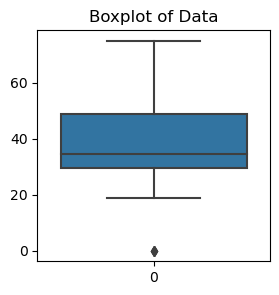

In [263]:
# Plotting – Boxplot

plt.figure(figsize=(3, 3))
sns.boxplot(data=df['Age'])
plt.title('Boxplot of Data')
plt.show()

#### IQR 
- Any value that satisfies these conditions are called outliers
    - If data point < Q1 - 1.5(IQR) (LL)
    - If data point > Q3 + 1.5(IQR) (UL)
  |

In [31]:
a = [i for i in range(10) if i%2==0]
a

[0, 2, 4, 6, 8]

In [259]:
#IQR method of finding outliers - more sensitive to outliers

import numpy as np
from scipy import stats as st

# syntax = [inter for inter in data]

def IQR_outliers(temp_data):
    return [i for i in temp_data if i < lower_limit or i > upper_limit]

salary = df['Salary'].dropna()

Q1,Q3= np.quantile(salary,[0.25,0.75])
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(upper_limit,lower_limit)
print('Outliers: ',IQR_outliers(salary))

59875.0 20875.0
Outliers:  [60000.0, 60000.0, 90000.0, 88000.0, 20000.0]


#### Z-score

- Also known as standard normal distribution score
- We are checking how many standard deviations away from the data point is the mean
- Z = x-mean/std
- if Z > +3 or Z < -3 the data point that produces this z-score is an outlier

In [260]:
import numpy as np

def outliers_of_data(data):
    outliers = []
    mean_of_data = np.mean(data)
    std_of_data = np.std(data)
    for i in data:
        z_score = (i - mean_of_data) / std_of_data
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers

# Example usage with DataFrame 'df' and column 'Salary'
salary = df['Salary'].dropna()
print('Outliers: ', outliers_of_data(salary))


Outliers:  [90000.0]


In [270]:
#Trimming

def trim_outliers(data,):
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    trimmed_data = data[(data >= lower_limit) & (data <= upper_limit)]
    return trimmed_data

Q1,Q3= np.quantile(salary,[0.25,0.75])
IQR = Q3-Q1

# Example usage
trimmed_salary = trim_outliers(df['Salary'])
trimmed_salary

0     40000.0
1     48000.0
2     45000.0
3     46000.0
5     42000.0
6     39000.0
7     42000.0
8     36000.0
10    46000.0
11    45500.0
12    38000.0
13    39000.0
14    35000.0
15    32000.0
16    42000.0
17    39000.0
18    42000.0
19    22000.0
21    23000.0
22    45000.0
23    22000.0
25    23000.0
26    26000.0
27    45000.0
31    39000.0
32    42000.0
Name: Salary, dtype: float64

In [171]:
lower_limit

21750.0

In [172]:
upper_limit

57750.0

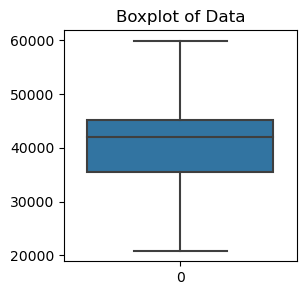

In [168]:
# Plotting – Boxplot

plt.figure(figsize=(3, 3))
sns.boxplot(data=capped_salary)
plt.title('Boxplot of Data')
plt.show()

In [ ]:
np.where(cond,true,false)

In [182]:
# Capping

np.where(
    df["Salary"] > 57750.0,   # Condition: If Salary > 57750.0
    57750.0,                  # Replace with 57750.0
    np.where(
        df["Salary"] < 21750.0,  # If Salary < 21750.0
        21750.0,                   # Replace with 21750.0
        df["Salary"]               # Otherwise, keep the original value
    )
)

array([40000., 48000., 45000., 46000.,    nan, 42000., 39000., 42000.,
       36000.,    nan, 46000., 45500., 38000., 39000., 35000., 32000.,
       42000., 39000., 42000., 22500., 57750., 23000., 45000., 22500.,
       57750., 23000., 26000., 45000., 57750., 57750., 22500., 39000.,
       42000.])

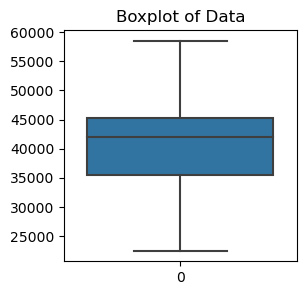

In [183]:
# Plotting – Boxplot

plt.figure(figsize=(3, 3))
sns.boxplot(data=df["Salary"])
plt.title('Boxplot of Data')
plt.show()